<a href="https://colab.research.google.com/github/judebebo32/ML_CLG/blob/main/CLCPPDPLOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

df = pd.read_excel('/content/CLC Data_s_2.xlsx')

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.inspection import (partial_dependence, PartialDependenceDisplay)  # you need to import these in order to have a PDP plot

# Get feature names from DataFrame columns
feature_names = df.columns[:-2]  # exclude the last two columns which are the output variables

print(df.columns)

Index(['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)',
       'FC (%)', 'Moisture (%)', 'T (°C)', 'OC (%)', 'SBR', 'H2 (wt.%)',
       'Char yield (wt.%)'],
      dtype='object')


In [12]:
# Select the desired input features
feature_names = ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)',
                 'FC (%)', 'Moisture (%)', 'T (°C)', 'OC (%)', 'SBR']

# Split data into input (X) and output (y) variables

X = df[feature_names]
y1 = df['H2 (wt.%)']
y2 = df['Char yield (wt.%)']

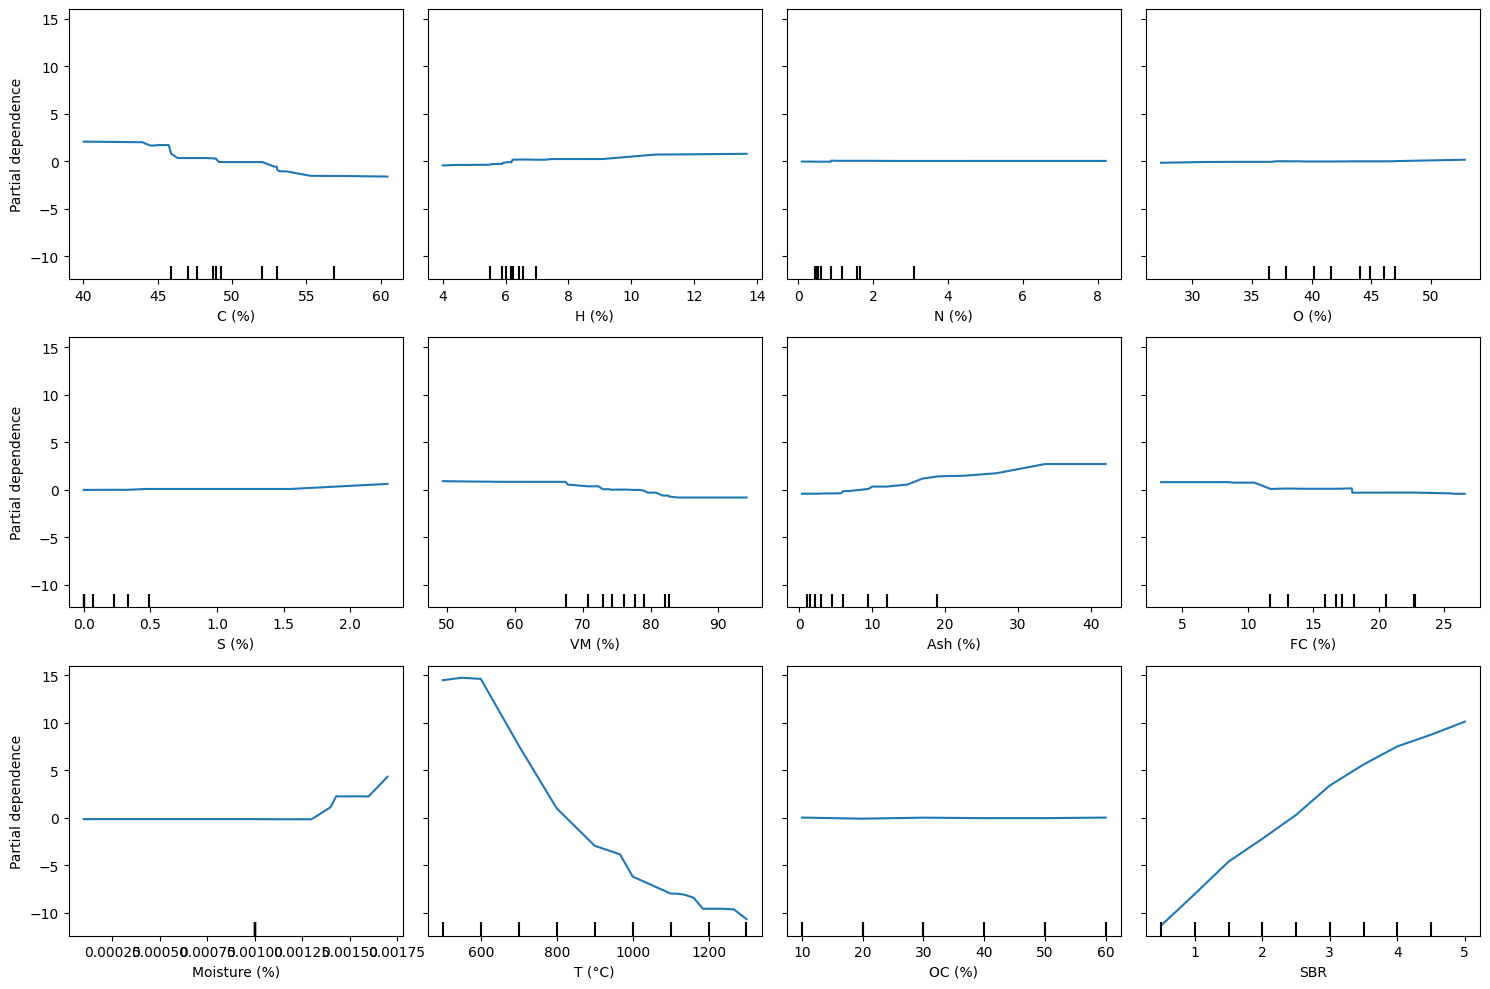

In [13]:
my_model = GradientBoostingRegressor()
my_model.fit(X, y1)
n_cols = 4
n_rows = int(len(X.columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 10))
PartialDependenceDisplay.from_estimator(my_model, X, X.columns, ax=ax, n_cols=n_cols,grid_resolution=50)
#fig.suptitle('Partial Dependence Plots')
fig.tight_layout();

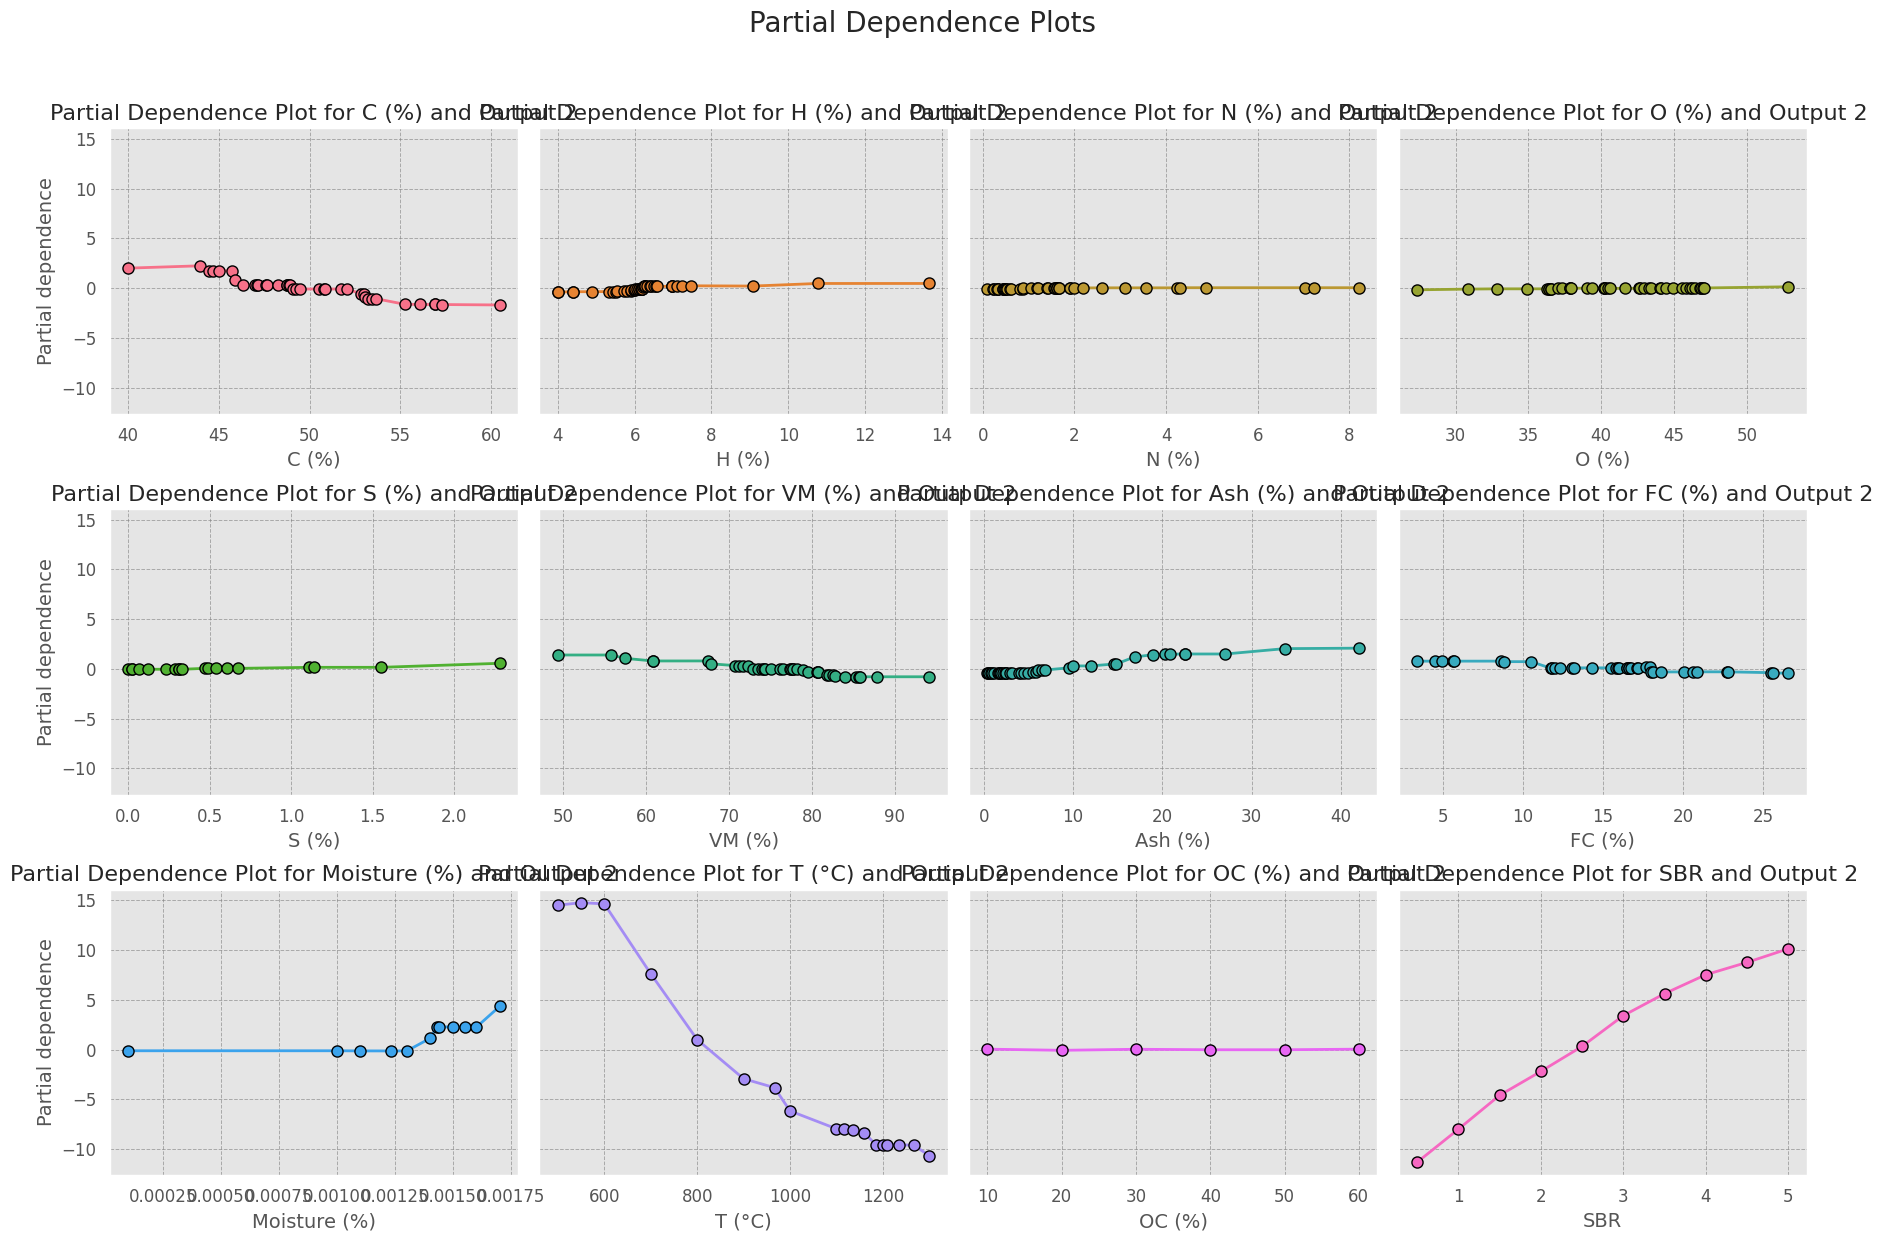

In [14]:
# Train the GradientBoostingRegressor model
my_model = GradientBoostingRegressor()
my_model.fit(X, y1)

# Set up the style and aesthetics
sns.set(style='whitegrid')
plt.style.use('ggplot')
color_palette = sns.color_palette("husl", len(X.columns))

# PDPs plots from the raw values extracted with partial_dependence
my_model1 = GradientBoostingRegressor()
my_model1.fit(X, y1)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(18, 12), sharey=True)

for i, x in enumerate(X.columns):
    raw_values = partial_dependence(my_model1, X, i, kind='average')
    loc = i // n_cols, i % n_cols
    sns.lineplot(x=raw_values['values'][0],
                 y=raw_values['average'][0], ax=ax[loc],
                 color=color_palette[i], linewidth=2, linestyle='-',
                 marker='o', markersize=8, markeredgecolor='black', markeredgewidth=1)

    ax[loc].set_xlabel(x, fontsize=14)
    ax[loc].set_title(f'Partial Dependence Plot for {feature_names[i]} and Output 2', fontsize=16)
    ax[loc].tick_params(axis='both', labelsize=12)
    ax[loc].grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.6)

    if i % n_cols == 0:
        ax[loc].set_ylabel('Partial dependence', fontsize=14)

fig.suptitle('Partial Dependence Plots', fontsize=20, y=1.03)
fig.tight_layout()

# Save the figure to a file
plt.savefig('fancy_partial_dependence_plots.png', dpi=300, bbox_inches='tight')
plt.show()

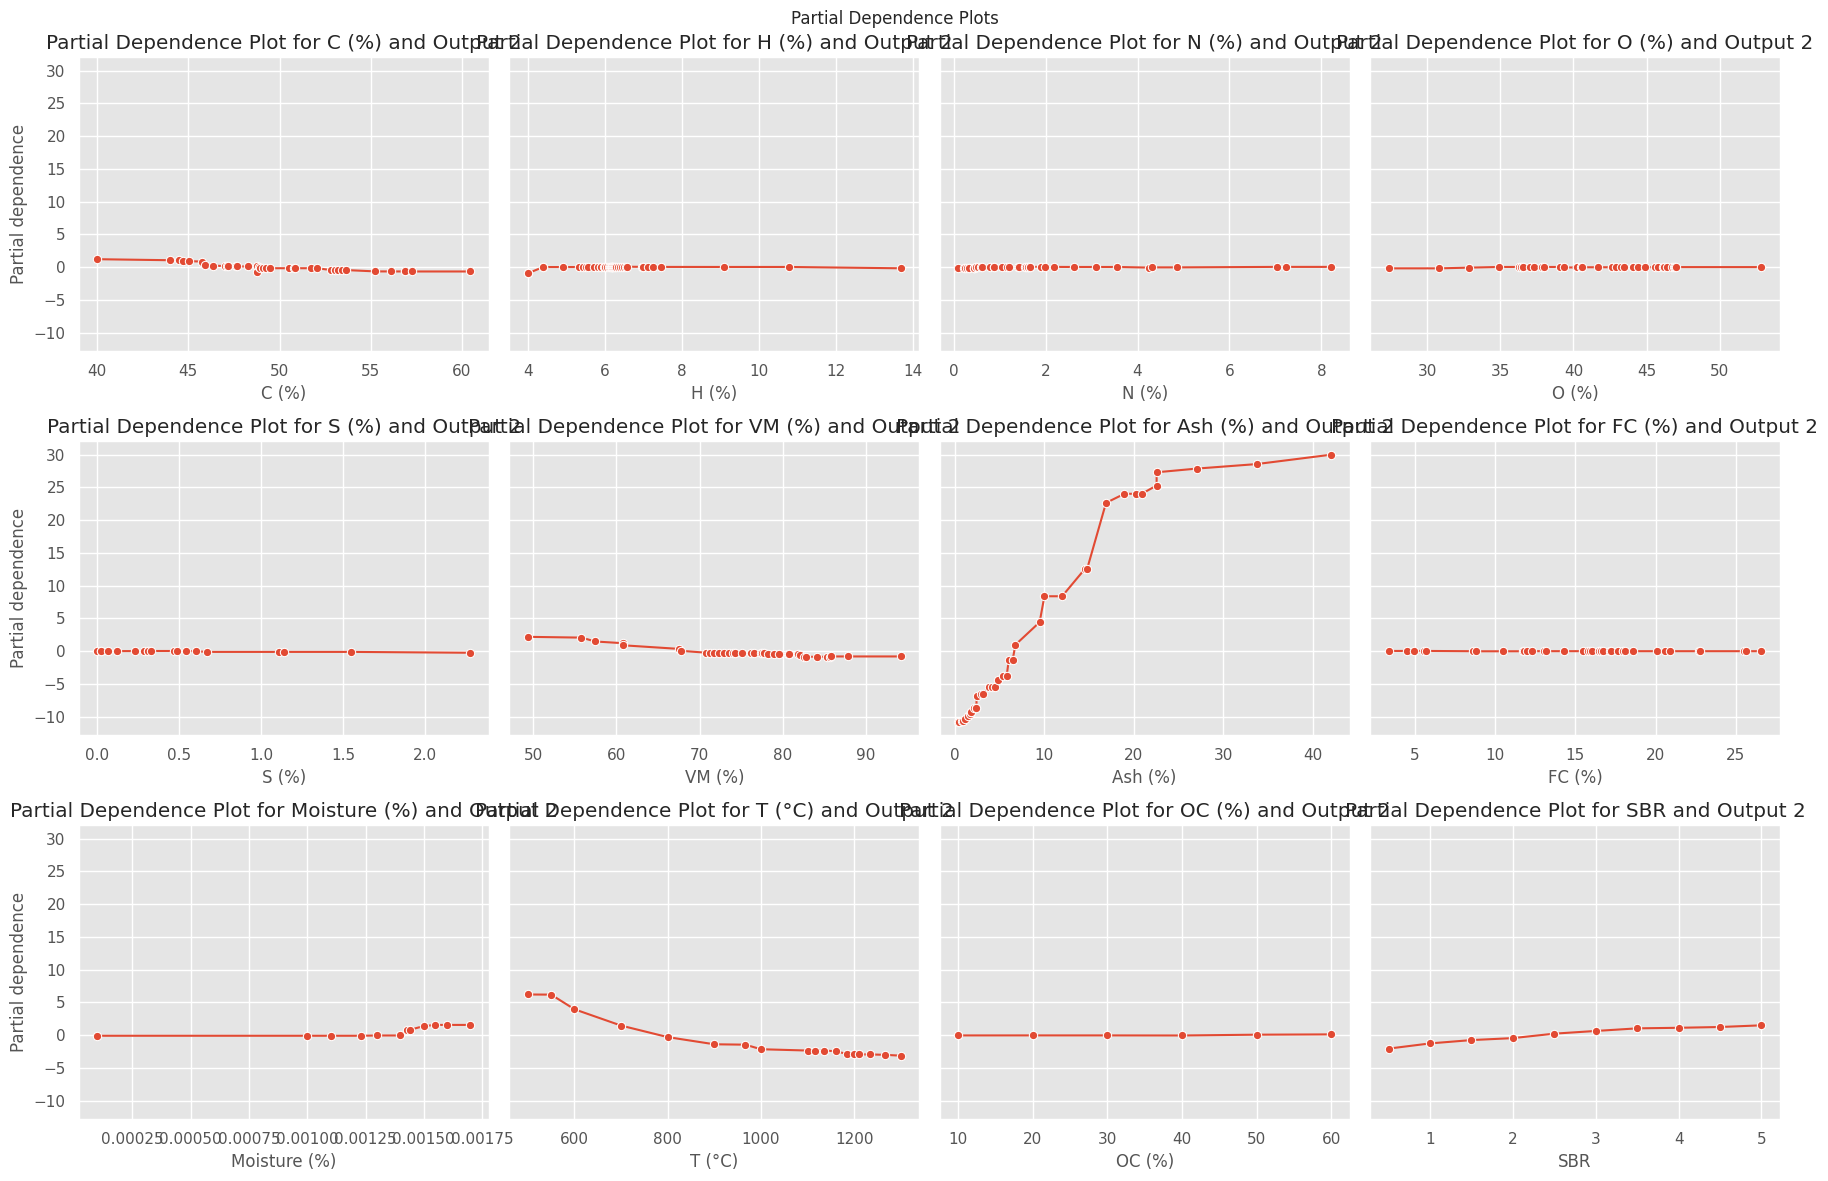

In [15]:
my_model2= GradientBoostingRegressor()
my_model2.fit(X, y2)
# PDPs plots from the raw values extracted with partial_dependence
fig, ax = plt.subplots(n_rows, n_cols, figsize=(18,12), sharey=True)
for i, x in enumerate(X.columns):
    raw_values = partial_dependence(my_model2, X, i, kind='average')
    loc = i//n_cols, i%n_cols
    sns.lineplot(x=raw_values['values'][0], 
                 y=raw_values['average'][0], ax=ax[loc], style=0, 
                 markers=True, legend=False)
    ax[loc].set_xlabel(x)
    ax[loc].set_title(f'Partial Dependence Plot for {feature_names[i]} and Output 2')
    if i%n_cols==0:
        ax[loc].set_ylabel('Partial dependence')
fig.suptitle('Partial Dependence Plots')
fig.tight_layout()

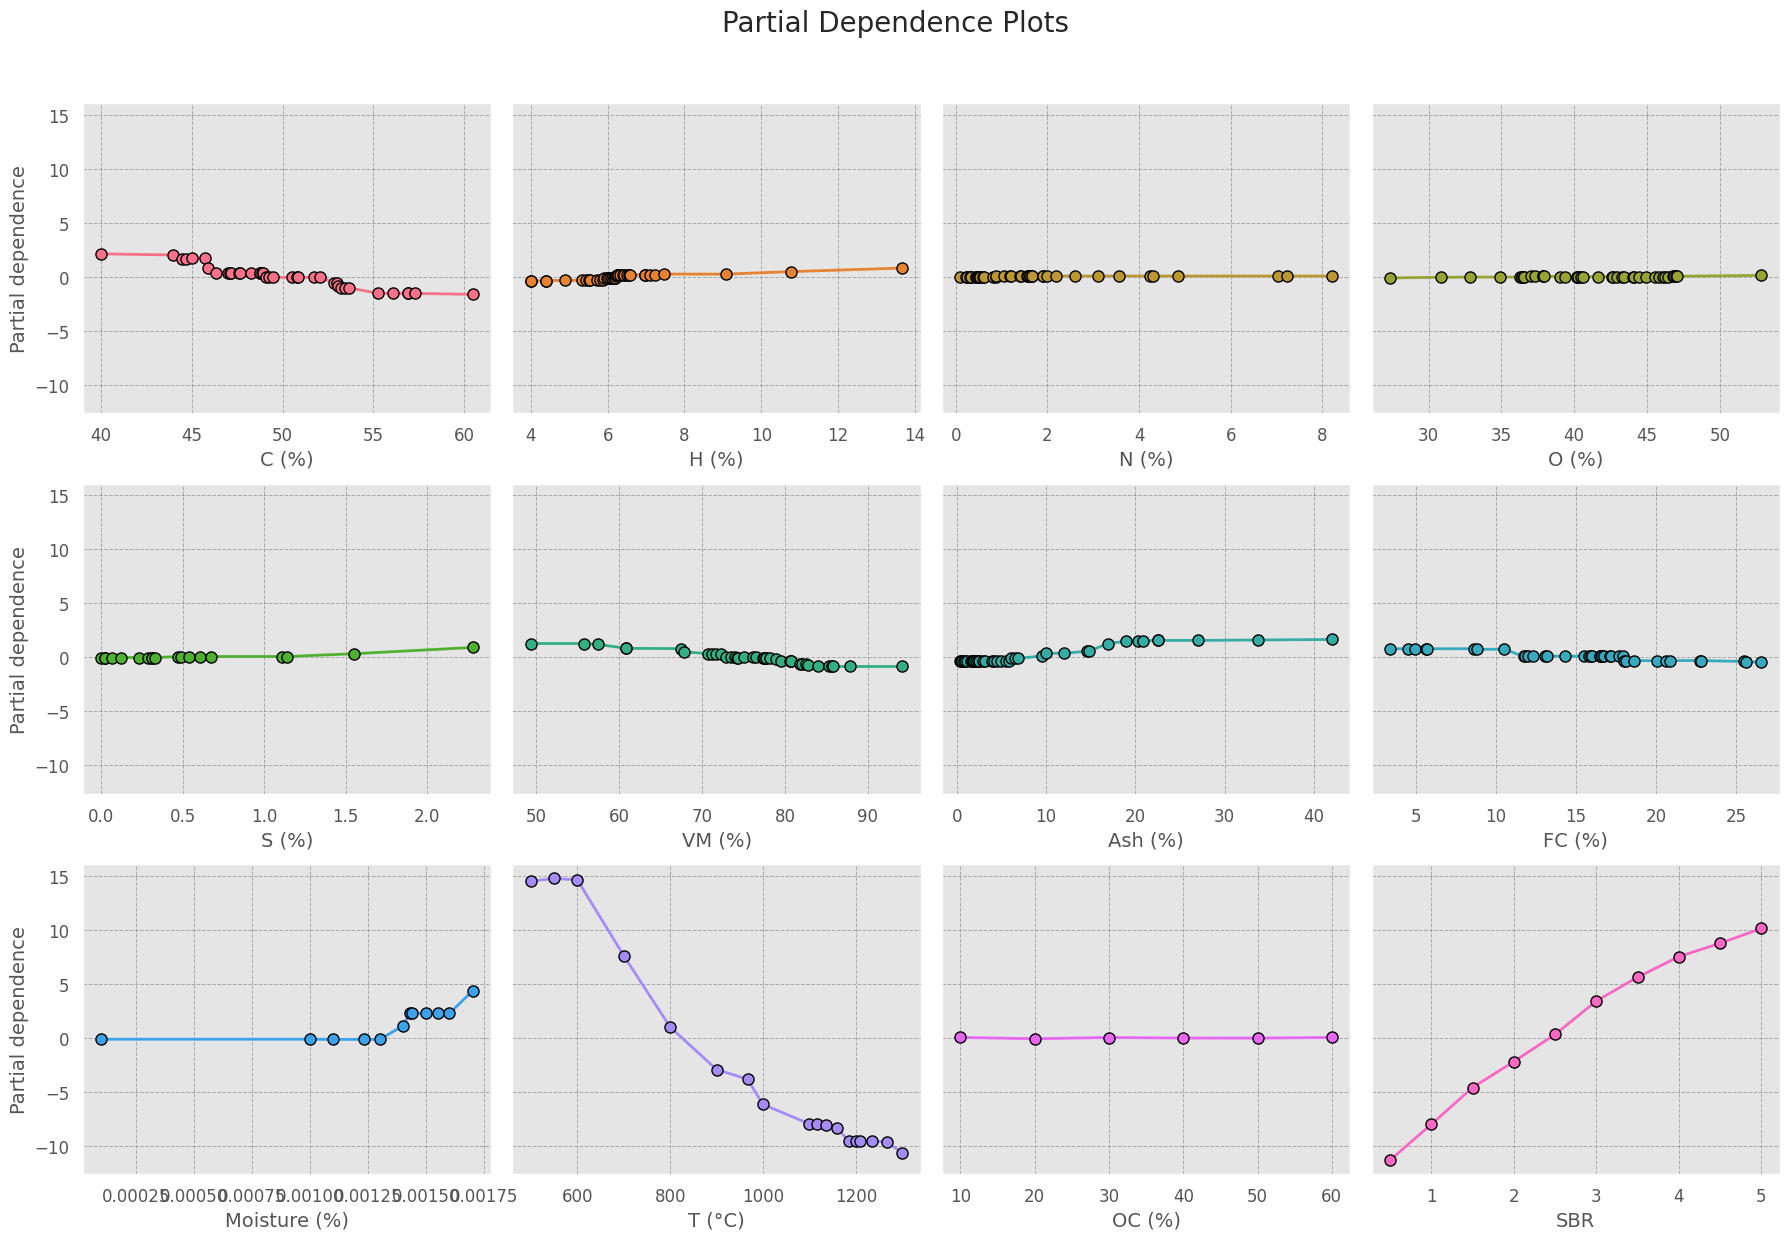

In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.inspection import partial_dependence

# Load and prepare the data
# ...

# Get feature names from DataFrame columns
# ...

# Select the desired input features
# ...

# Split data into input (X) and output (y) variables
# ...

# Train the GradientBoostingRegressor model
my_model = GradientBoostingRegressor()
my_model.fit(X, y1)

# Set up the style and aesthetics
sns.set(style='whitegrid')
plt.style.use('ggplot')
color_palette = sns.color_palette("husl", len(X.columns))

# PDPs plots from the raw values extracted with partial_dependence
my_model1 = GradientBoostingRegressor()
my_model1.fit(X, y1)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(18, 12), sharey=True)

for i, x in enumerate(X.columns):
    raw_values = partial_dependence(my_model1, X, i, kind='average')
    loc = i // n_cols, i % n_cols
    sns.lineplot(x=raw_values['values'][0],
                 y=raw_values['average'][0], ax=ax[loc],
                 color=color_palette[i], linewidth=2, linestyle='-',
                 marker='o', markersize=8, markeredgecolor='black', markeredgewidth=1)

    ax[loc].set_xlabel(x, fontsize=14)
    #ax[loc].set_title(f'Partial Dependence Plot for {feature_names[i]} and Output 2', fontsize=16)
    ax[loc].tick_params(axis='both', labelsize=12)
    ax[loc].grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.6)

    if i % n_cols == 0:
        ax[loc].set_ylabel('Partial dependence', fontsize=14)

fig.suptitle('Partial Dependence Plots', fontsize=20, y=1.03)
fig.tight_layout()

# Save the figure to a file
plt.savefig('partial_dependence_plots_no_titles.png', dpi=300, bbox_inches='tight')
plt.show()


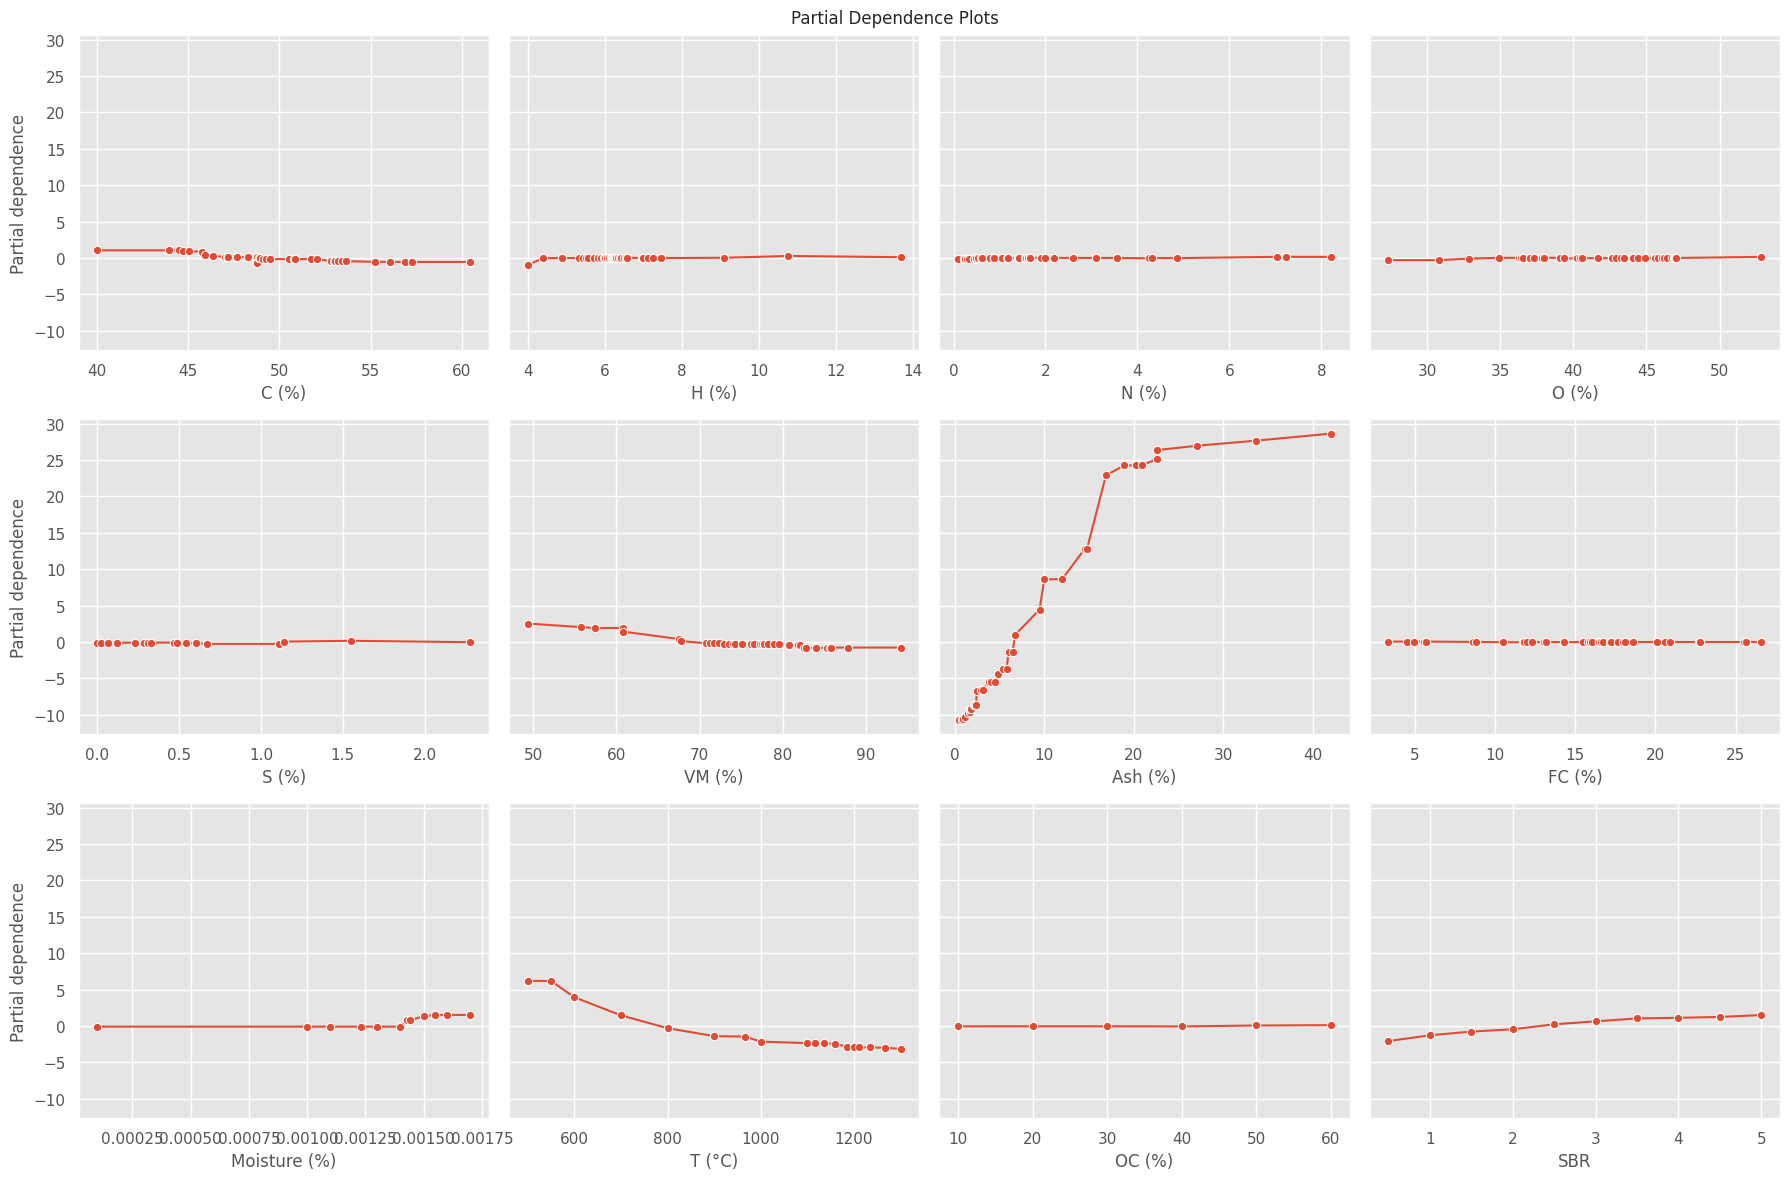

In [18]:
my_model2= GradientBoostingRegressor()
my_model2.fit(X, y2)
# PDPs plots from the raw values extracted with partial_dependence
fig, ax = plt.subplots(n_rows, n_cols, figsize=(18,12), sharey=True)
for i, x in enumerate(X.columns):
    raw_values = partial_dependence(my_model2, X, i, kind='average')
    loc = i//n_cols, i%n_cols
    sns.lineplot(x=raw_values['values'][0], 
                 y=raw_values['average'][0], ax=ax[loc], style=0, 
                 markers=True, legend=False)
    ax[loc].set_xlabel(x)
    #ax[loc].set_title(f'Partial Dependence Plot for {feature_names[i]} and Output 2')
    if i%n_cols==0:
        ax[loc].set_ylabel('Partial dependence')
fig.suptitle('Partial Dependence Plots')
fig.tight_layout()

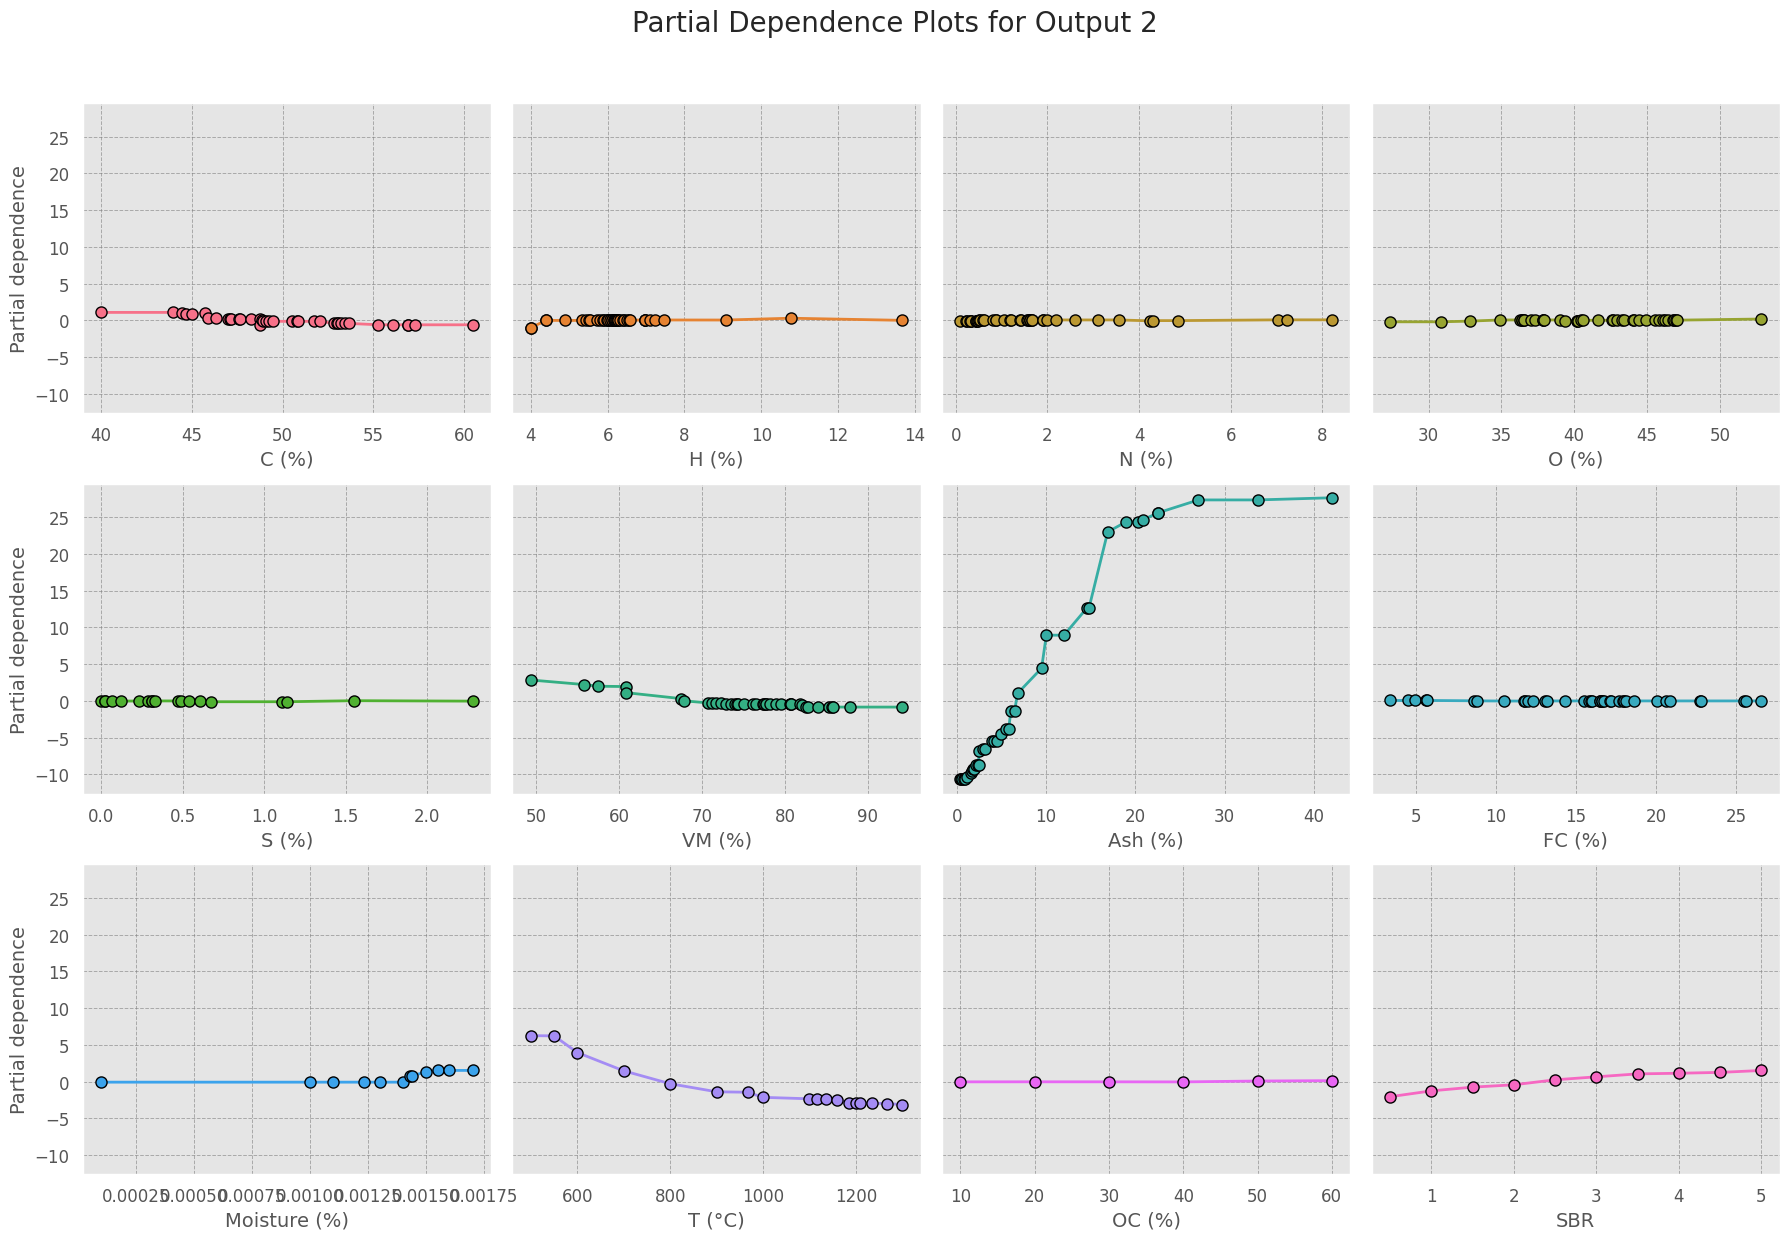

In [19]:
my_model2 = GradientBoostingRegressor()
my_model2.fit(X, y2)

# Set up the style and aesthetics
sns.set(style='whitegrid')
plt.style.use('ggplot')
color_palette = sns.color_palette("husl", len(X.columns))

# PDPs plots from the raw values extracted with partial_dependence
fig, ax = plt.subplots(n_rows, n_cols, figsize=(18, 12), sharey=True)

for i, x in enumerate(X.columns):
    raw_values = partial_dependence(my_model2, X, i, kind='average')
    loc = i // n_cols, i % n_cols
    sns.lineplot(x=raw_values['values'][0],
                 y=raw_values['average'][0], ax=ax[loc],
                 color=color_palette[i], linewidth=2, linestyle='-',
                 marker='o', markersize=8, markeredgecolor='black', markeredgewidth=1)

    ax[loc].set_xlabel(x, fontsize=14)
    #ax[loc].set_title(f'Partial Dependence Plot for {feature_names[i]} and Output 2', fontsize=16)
    ax[loc].tick_params(axis='both', labelsize=12)
    ax[loc].grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.6)

    if i % n_cols == 0:
        ax[loc].set_ylabel('Partial dependence', fontsize=14)

fig.suptitle('Partial Dependence Plots for Output 2', fontsize=20, y=1.03)
fig.tight_layout()

# Save the figure to a file
plt.savefig('fancy_partial_dependence_plots_output2.png', dpi=300, bbox_inches='tight')
plt.show()


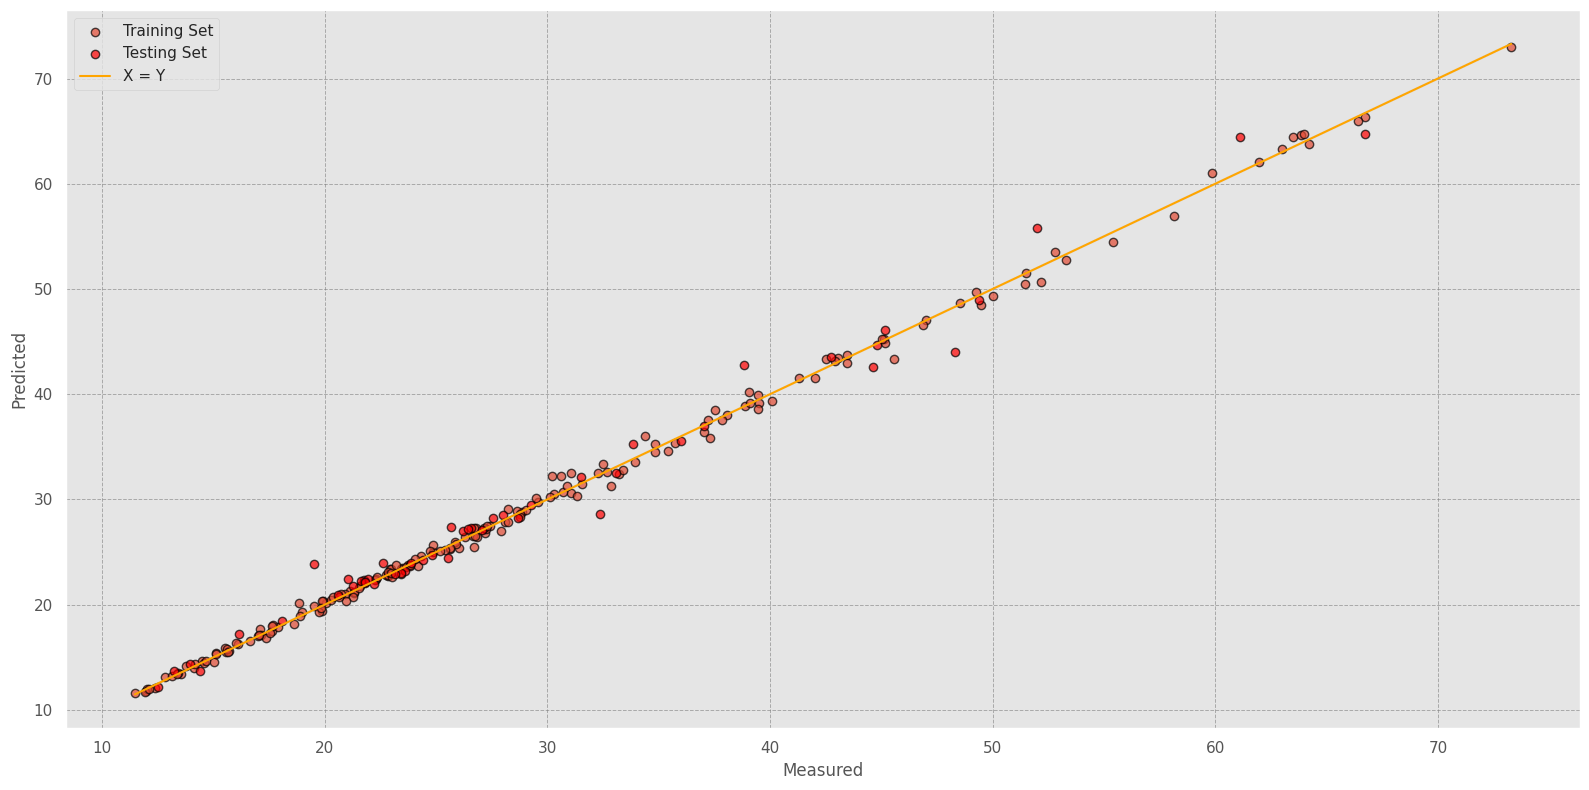

In [20]:
def plot_train_set(y_train_df, y_train_pred_df, y_test_df, y_test_pred_df):
    """ A function that plots the comparison of the predictions of the various target variables for a ML models 
        fitted from the training set and testing set.
        params:
        y_train_df: A dataframe containing the original training dataset
        y_train_pred_df: A dataframe containing the predictions for the training dataset,
        y_test_df:  A dataframe containing the original testing dataset
        y_test_pred_df: A dataframe containing the predictions for the testing dataset 
    """

    plt.rcParams.update({'font.size': 12})
    sns.set(style='whitegrid')
    plt.style.use('ggplot')
    
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))

    ax.scatter(y_train_df, y_train_pred_df, edgecolor='black', linewidth=1, alpha=0.7, label="Training Set")
    ax.scatter(x=y_test_df, y=y_test_pred_df, color='red', marker='o', edgecolor='black', linewidth=1, alpha=0.7, label="Testing Set")

    # add straight line
    line = np.linspace(np.min(y_train_df.to_numpy()), np.max(y_train_df.to_numpy()))
    ax.plot(line, line, linewidth=1.5, color='orange', zorder=4, label="X = Y")

    # Add error regions
    ax.fill_between(line, line - 0.12, line + 0.12, color='grey', linestyle='dashed', alpha=0.05)  # 12% error

    # set labels
    ax.set(xlabel=f'Measured', ylabel=f'Predicted')
    ax.legend(loc='upper left')
    ax.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.6)
    plt.tight_layout()
    plt.show()

# for y1
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)
my_model1 = GradientBoostingRegressor()
my_model1.fit(X_train, y_train)
y_test_pred = my_model1.predict(X_test)
y_train_pred = my_model1.predict(X_train)

plot_train_set(y_train, y_train_pred, y_test, y_test_pred)


<ipython-input-22-eaec063a9bff>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


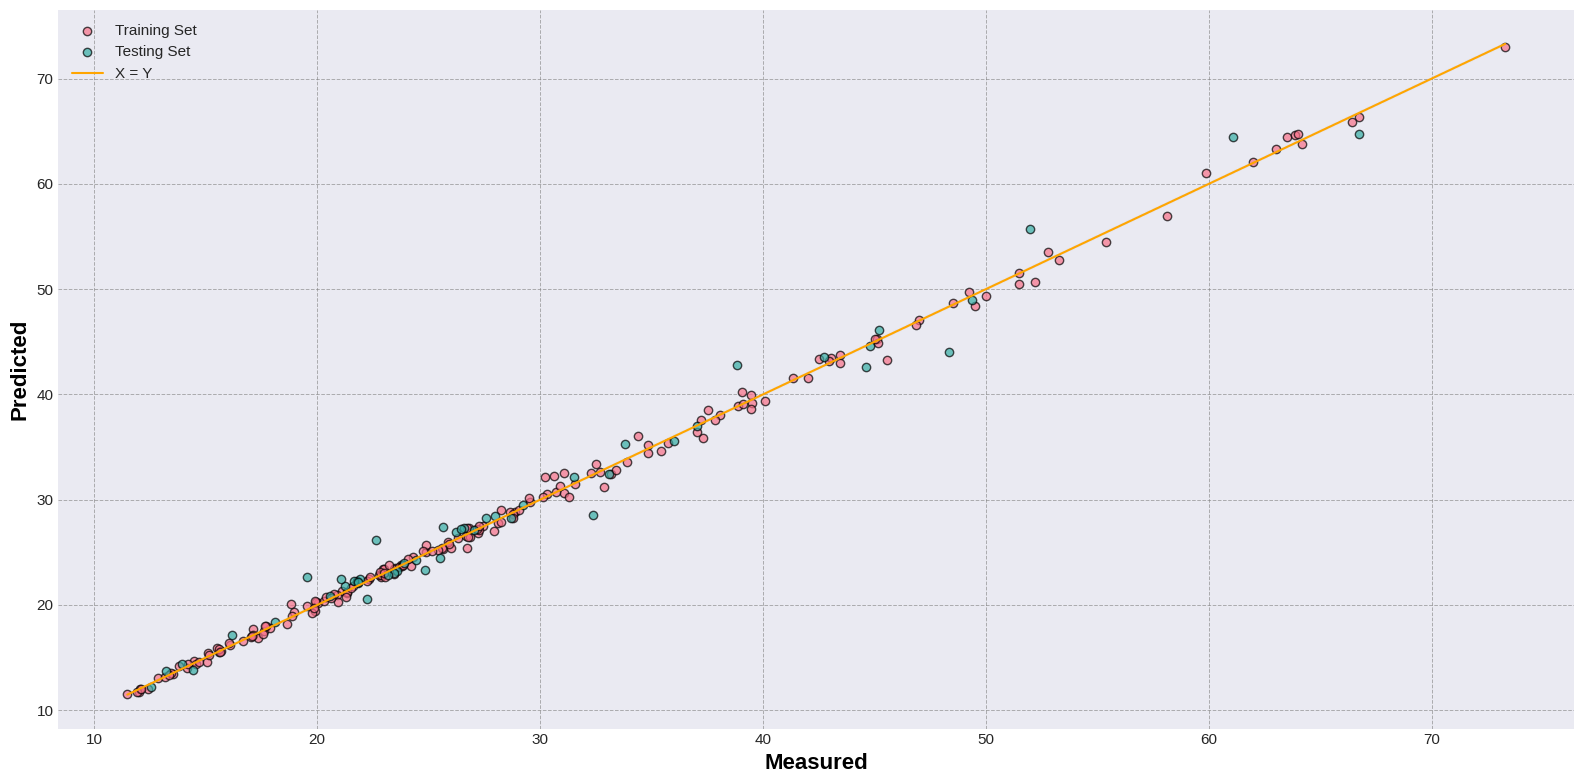

In [22]:
def plot_train_set(y_train_df, y_train_pred_df, y_test_df, y_test_pred_df):
    """ A function that plots the comparison of the predictions of the various target variables for a ML models 
        fitted from the training set and testing set.
        params:
        y_train_df: A dataframe containing the original training dataset
        y_train_pred_df: A dataframe containing the predictions for the training dataset,
        y_test_df:  A dataframe containing the original testing dataset
        y_test_pred_df: A dataframe containing the predictions for the testing dataset 
    """

    plt.rcParams.update({'font.size': 12})
    sns.set(style='whitegrid')
    plt.style.use('seaborn-darkgrid')
    color_palette = sns.color_palette("husl", 2)
    
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))

    ax.scatter(y_train_df, y_train_pred_df, edgecolor='black', linewidth=1, alpha=0.7, color=color_palette[0], label="Training Set")
    ax.scatter(x=y_test_df, y=y_test_pred_df, color=color_palette[1], marker='o', edgecolor='black', linewidth=1, alpha=0.7, label="Testing Set")

    # add straight line
    line = np.linspace(np.min(y_train_df.to_numpy()), np.max(y_train_df.to_numpy()))
    ax.plot(line, line, linewidth=1.5, color='orange', zorder=4, label="X = Y")

    # Add error regions
    ax.fill_between(line, line - 0.12, line + 0.12, color='grey', linestyle='dashed', alpha=0.05)  # 12% error

    # set labels
    ax.set(xlabel=f'Measured', ylabel=f'Predicted')
    ax.set_xlabel(f'Measured', fontsize=16, fontweight='bold', color='black')
    ax.set_ylabel(f'Predicted', fontsize=16, fontweight='bold', color='black')
    ax.legend(loc='upper left')
    ax.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.6)
    plt.tight_layout()
    plt.show()

# for y1
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)
my_model1 = GradientBoostingRegressor()
my_model1.fit(X_train, y_train)
y_test_pred = my_model1.predict(X_test)
y_train_pred = my_model1.predict(X_train)

plot_train_set(y_train, y_train_pred, y_test, y_test_pred)


<ipython-input-23-e0262ac7ac9b>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


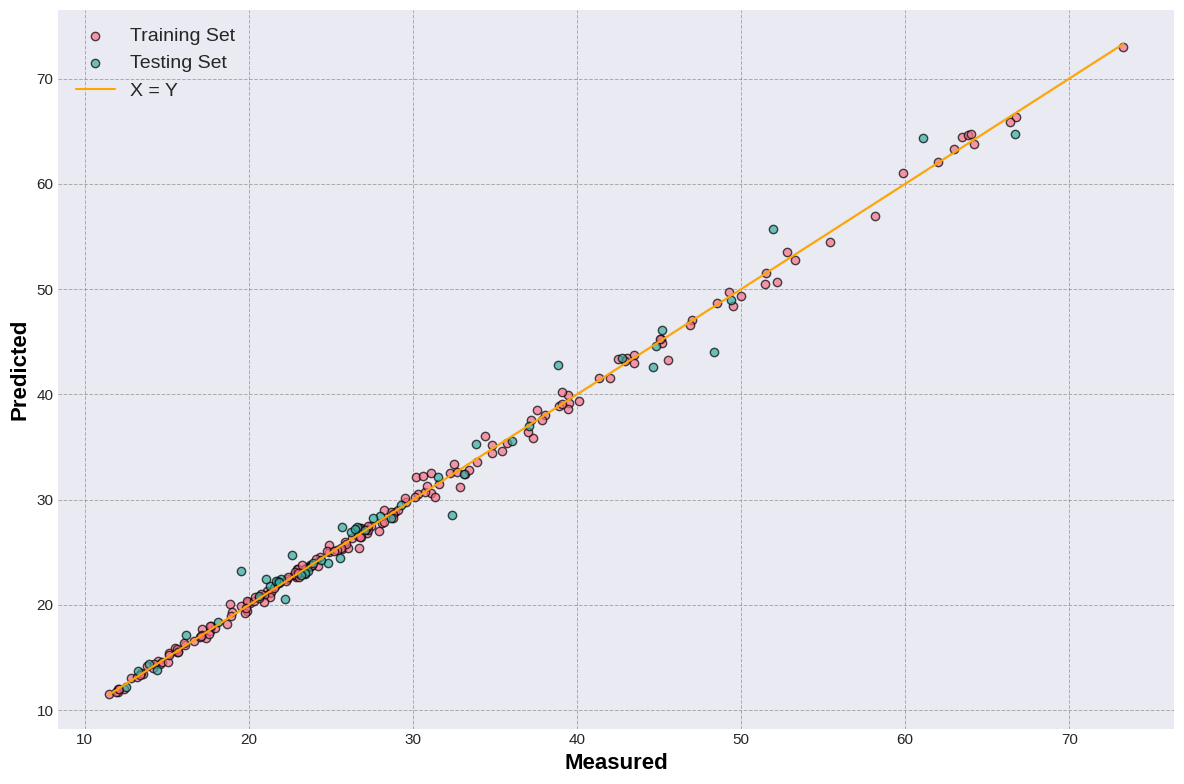

In [23]:
def plot_train_set(y_train_df, y_train_pred_df, y_test_df, y_test_pred_df):
    """ A function that plots the comparison of the predictions of the various target variables for a ML models 
        fitted from the training set and testing set.
        params:
        y_train_df: A dataframe containing the original training dataset
        y_train_pred_df: A dataframe containing the predictions for the training dataset,
        y_test_df:  A dataframe containing the original testing dataset
        y_test_pred_df: A dataframe containing the predictions for the testing dataset 
    """

    plt.rcParams.update({'font.size': 14})
    sns.set(style='whitegrid')
    plt.style.use('seaborn-darkgrid')
    color_palette = sns.color_palette("husl", 2)
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    ax.scatter(y_train_df, y_train_pred_df, edgecolor='black', linewidth=1, alpha=0.7, color=color_palette[0], label="Training Set")
    ax.scatter(x=y_test_df, y=y_test_pred_df, color=color_palette[1], marker='o', edgecolor='black', linewidth=1, alpha=0.7, label="Testing Set")

    # add straight line
    line = np.linspace(np.min(y_train_df.to_numpy()), np.max(y_train_df.to_numpy()))
    ax.plot(line, line, linewidth=1.5, color='orange', zorder=4, label="X = Y")

    # Add error regions
    ax.fill_between(line, line - 0.12, line + 0.12, color='grey', linestyle='dashed', alpha=0.05)  # 12% error

    # set labels
    ax.set(xlabel=f'Measured', ylabel=f'Predicted')
    ax.set_xlabel(f'Measured', fontsize=16, fontweight='bold', color='black')
    ax.set_ylabel(f'Predicted', fontsize=16, fontweight='bold', color='black')
    ax.legend(loc='upper left', fontsize=14)
    ax.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.6)
    plt.tight_layout()
    plt.show()

# for y1
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)
my_model1 = GradientBoostingRegressor()
my_model1.fit(X_train, y_train)
y_test_pred = my_model1.predict(X_test)
y_train_pred = my_model1.predict(X_train)

plot_train_set(y_train, y_train_pred, y_test, y_test_pred)


<ipython-input-23-e0262ac7ac9b>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


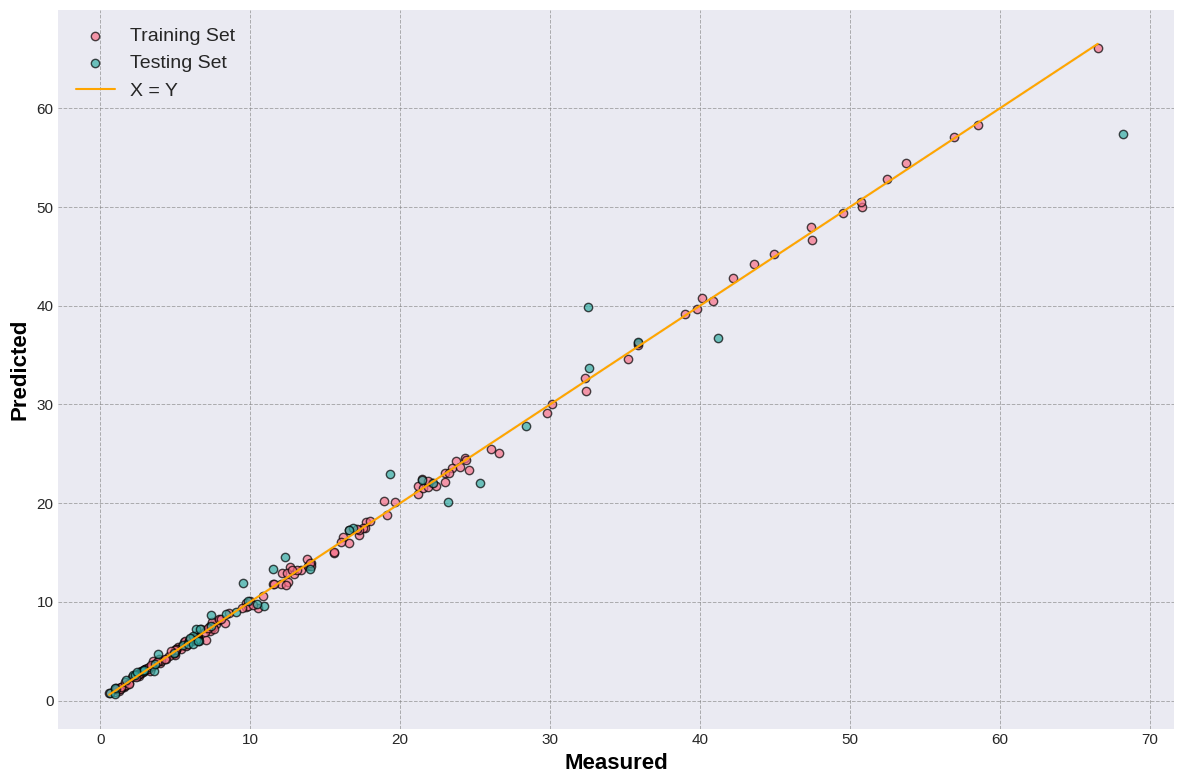

In [24]:

# for y2
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)
my_model2 = GradientBoostingRegressor()
my_model2.fit(X_train, y_train)
y_test_pred = my_model2.predict(X_test)
y_train_pred = my_model2.predict(X_train)

plot_train_set(y_train,y_train_pred,y_test,y_test_pred)